In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from datetime import datetime


TypeError: exponential_fit_3d() missing 2 required positional arguments: 'c' and 'd'

In [7]:
sns.set_style('whitegrid')

In [84]:
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Given data
x_data = np.array([1, 20, 40, 70])
y_data = np.array([1.5, 2, 2.3, 2.4])

# Use curve_fit to fit the data to the exponential function
params, covariance = curve_fit(exponential_function, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit = params

# Print the fitted parameters
print(f"Fitted 'a' parameter: {a_fit}")
print(f"Fitted 'b' parameter: {b_fit}")


Fitted 'a' parameter: 1.1052524301498764e-17
Fitted 'b' parameter: 1.0000000000130473


In [71]:
df = pd.read_csv('growth_df.csv')
df['monitoring_date'] = pd.to_datetime(df['monitoring_date'])
df['harvest_date'] = pd.to_datetime(df['harvest_date'])
df['stockedAt'] = pd.to_datetime(df['stockedAt'])

df_2023 = df[df['monitoring_date'] >= datetime(2023, 1, 1)]

farm_name = 'Velomar Cia Ltda'

farm_df = df_2023[df_2023['farmName'] == farm_name]


In [72]:
farm_df['cycle_days'] = (farm_df['monitoring_date'] - farm_df['stockedAt']).dt.days

/var/folders/8q/s2675dcn76s02xw57xss4f040000gn/T/ipykernel_1174/1376988875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_df['cycle_days'] = (farm_df['monitoring_date'] - farm_df['stockedAt']).dt.days


In [81]:
farm_df.head()

,Unnamed: 0,populationId,monitoring_date,mlResultAverageWeight,mlResultWeightCv,weightDistribution,seedingAverageWeight,stockedAt,farmName,pondSize,total,survivalRate,harvest_date,growth_since_stocking,growth_rate_since_stocking,days_since_stocking,growth_from_two_weeks,weekly_growth_rate_two_weeks,cycle_days
24340,24340,64357490b4bb2f58a46d8183,2023-04-04,1.390298,0.142306,"[1.4484505010492046, 1.2807067590901242, 1.309...",1.0,2023-03-30,Velomar Cia Ltda,8.0,152,"{""2023-04-26"": 0.75, ""2023-05-06"": 0.7, ""2023-...",2023-06-22 21:49:18.090000+00:00,0.390298,0.546,5.0,NaN,NaN,5
24376,24376,64356f8bb4bb2f58a46d817f,2023-04-04,2.053086,0.284710,"[1.6128816253017009, 2.8724436590666964, 3.197...",1.0,2023-03-30,Velomar Cia Ltda,17.0,193,"{""2023-04-26"": 0.75, ""2023-05-06"": 0.7, ""2023-...",2023-06-22 21:48:56.757000+00:00,1.053086,1.474,5.0,NaN,NaN,5
24865,24865,6422173b176638c378197d5d,2023-04-11,4.827645,0.248453,"[4.611856987080851, 3.802208768567051, 3.87104...",1.0,2023-03-30,Velomar Cia Ltda,15.0,155,"{""2023-04-26"": 0.75, ""2023-05-06"": 0.7, ""2023-...",2023-06-22 21:48:25.286000+00:00,3.827645,2.233,12.0,NaN,NaN,12
24882,24882,64356f8bb4bb2f58a46d817f,2023-04-11,3.667292,0.195600,"[5.083046680696139, 2.660481683709987, 3.38587...",1.0,2023-03-30,Velomar Cia Ltda,17.0,177,"{""2023-04-26"": 0.75, ""2023-05-06"": 0.7, ""2023-...",2023-06-22 21:48:56.757000+00:00,2.667292,1.556,12.0,NaN,NaN,12
24885,24885,64357490b4bb2f58a46d8183,2023-04-11,2.978113,0.262429,"[3.79023688392852, 2.158280842548458, 3.413014...",1.0,2023-03-30,Velomar Cia Ltda,8.0,59,"{""2023-04-26"": 0.75, ""2023-05-06"": 0.7, ""2023-...",2023-06-22 21:49:18.090000+00:00,1.978113,1.154,12.0,NaN,NaN,12


<Axes: xlabel='mlResultAverageWeight', ylabel='growth_rate_since_stocking'>

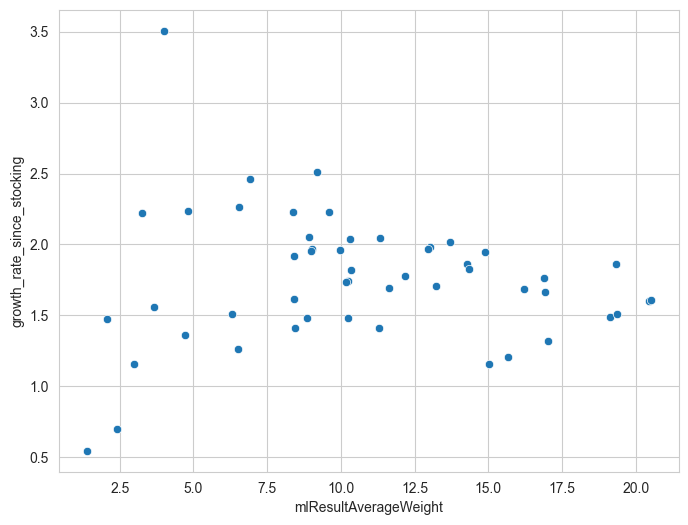

In [74]:
fig, ax = plt.subplots(figsize = (8,6))


plot_df = farm_df[(farm_df['growth_rate_since_stocking'] >0) & (farm_df['growth_rate_since_stocking'] <4)]
y = plot_df['growth_rate_since_stocking']
x = plot_df['mlResultAverageWeight']
sns.scatterplot(x = x, y = y)

<Axes: xlabel='cycle_days', ylabel='growth_rate_since_stocking'>

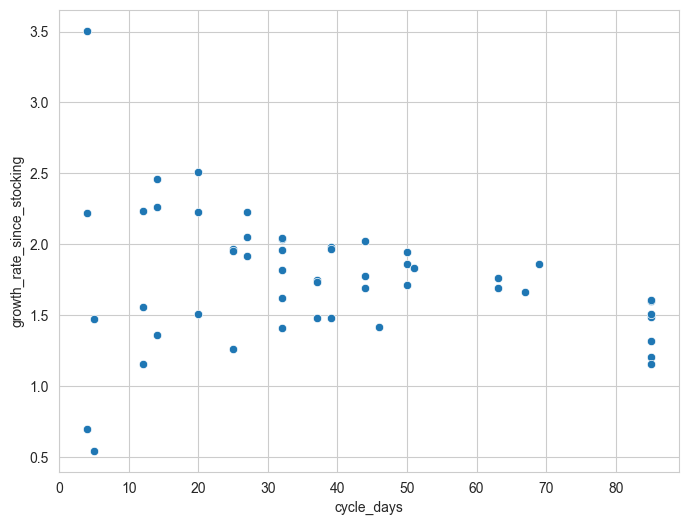

In [75]:
fig, ax = plt.subplots(figsize = (8,6))


plot_df = farm_df[(farm_df['cycle_days'] <150) & (farm_df['seedingAverageWeight'] <5) & (farm_df['growth_rate_since_stocking'] < 5)& (farm_df['growth_rate_since_stocking'] > 0.5)]
x = plot_df['cycle_days']
y = plot_df['growth_rate_since_stocking']
sns.scatterplot(x = x, y = y)

<Axes: xlabel='cycle_days', ylabel='growth_since_stocking'>

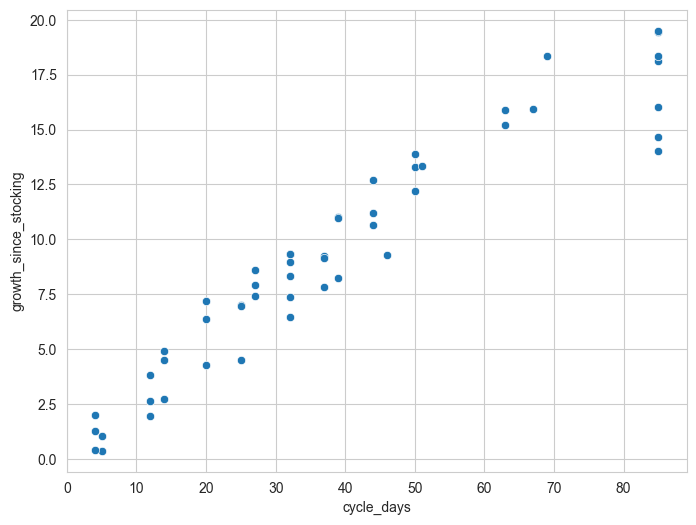

In [80]:
fig, ax = plt.subplots(figsize = (8,6))


plot_df = farm_df[(farm_df['cycle_days'] <150) & (farm_df['seedingAverageWeight'] <5) & (farm_df['growth_rate_since_stocking'] < 5)& (farm_df['growth_rate_since_stocking'] > 0.5)]
x = plot_df['cycle_days']
y = plot_df['growth_since_stocking']
sns.scatterplot(x = x, y = y)

<Axes: xlabel='mlResultAverageWeight', ylabel='weekly_growth_rate_two_weeks'>

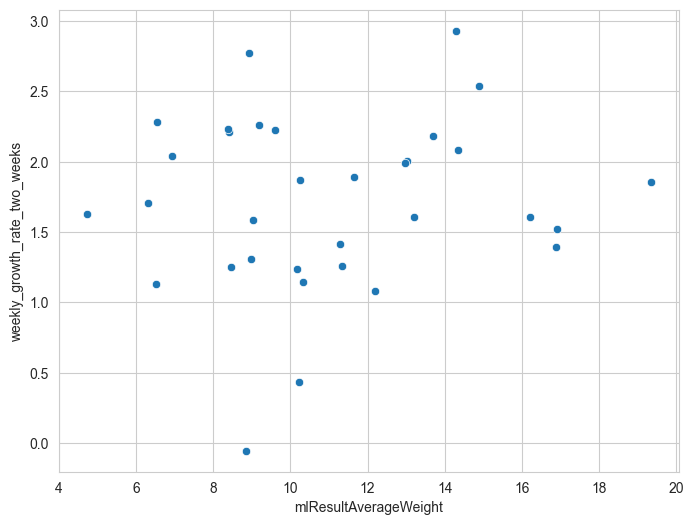

In [82]:
fig, ax = plt.subplots(figsize = (8,6))


plot_df = farm_df[(farm_df['weekly_growth_rate_two_weeks'] >-1) & (farm_df['weekly_growth_rate_two_weeks'] <5)]
y = plot_df['weekly_growth_rate_two_weeks']
x = plot_df['mlResultAverageWeight']
sns.scatterplot(x= x, y = y)

<Axes: xlabel='mlResultAverageWeight', ylabel='mlResultWeightCv'>

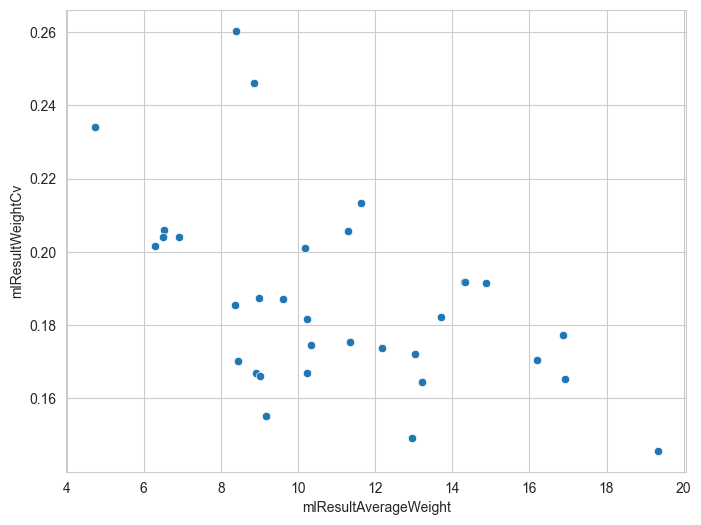

In [78]:
fig, ax = plt.subplots(figsize = (8,6))


plot_df = farm_df[(farm_df['weekly_growth_rate_two_weeks'] >-1) & (farm_df['weekly_growth_rate_two_weeks'] <5)]
y = plot_df['mlResultWeightCv']
x = plot_df['mlResultAverageWeight']
sns.scatterplot(x = x, y = y)

<Axes: xlabel='mlResultAverageWeight', ylabel='survivalRate'>

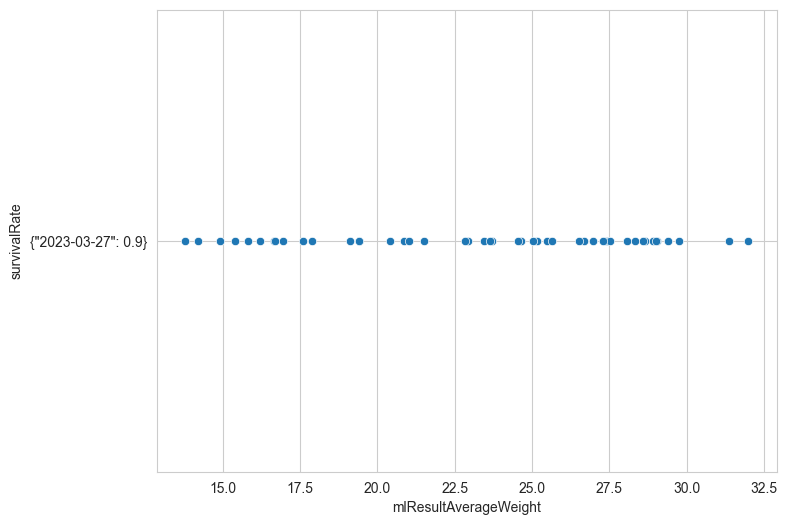

In [65]:
fig, ax = plt.subplots(figsize = (8,6))


plot_df = farm_df[(farm_df['weekly_growth_rate_two_weeks'] >-1) & (farm_df['weekly_growth_rate_two_weeks'] <5)]
y = plot_df['survivalRate']
x = plot_df['mlResultAverageWeight']
sns.scatterplot(x = x, y = y)